In [292]:
using LinearAlgebra
using DelimitedFiles
using PyPlot
using Random
using LinearAlgebra
using Statistics
using DCAUtils
using StatsBase
using Distributions

In [89]:
include("energy.jl");
include("MontecarloUtils.jl");
include("dATline.jl")

dATlineSearch (generic function with 1 method)

In [3]:
### Model parameters
L = 100 
Connectivity = 4  ## Average connectivity of the model
p = Connectivity/(L-1)
R = 0.2 ## Standard deviation used to extract random couplings


### Initialize seed RNG
RNGseed = 10
Random.seed!(RNGseed)


### Initialize fields & couplings
# h = zeros(Float64,L) ## No fields
FieldDistribution = Normal(0,0.02) ## Gaussian fields
# FieldDistribution = Truncated(Cauchy(0,0.5),-100,100) ## Cauchy fields
h=rand(FieldDistribution, L)  

J = zeros(Float64,L,L)
for i = 1:L
    for j = i+1:L
        if rand() < p
            # Jvalue = 1.0 ## Fixed ferromagnetic couplings
            Jvalue = rand(Normal(0,R))
            J[i,j] = Jvalue
            J[j,i] = Jvalue
        end
    end
end


### Check that J is symmetric
for i in 1:L
    for j in 1:L
        @assert J[i,j] == J[j,i]
    end
end     


### Initialize the spin configuration to a random one
S = zeros(Int,L)
for i = 1:L
    if rand() > 0.5
        S[i] = 1
    else
        S[i] = -1
    end
end

### Plot histogram of fields
histogram(h)

LoadError: UndefVarError: `histogram` not defined

In [4]:
### Print configuration of couplings and fields in a file
file_coupl = "CouplingsFields_Connectivity$(Connectivity)_seed$(RNGseed)_L$(L)"

open(file_coupl, "w") do f
    for i in 1:L
        for j in i:L
            println(f,"$i $j $(J[i,j])")
        end
    end

    println(f,"")

    for i in 1:L
            println(f,"$i $(h[i])")
    end
end

### Montecarlo simulations

In [11]:
###
T = 0.2
Nstore = 10
Nsteps = 100
overlap_all2 = zeros(Nstore,500)
for iter in 1:500
    S = zeros(Int,L)
    for i = 1:L
        if rand() > 0.5
            S[i] = 1
        else
            S[i] = -1
        end
    end
    en,magn,overlap,seq = MCMC_Metropolis_store_en_magn(Nstore,Nsteps,S,L,h,J,1/T)
    overlap_all2[:,iter] = overlap
end

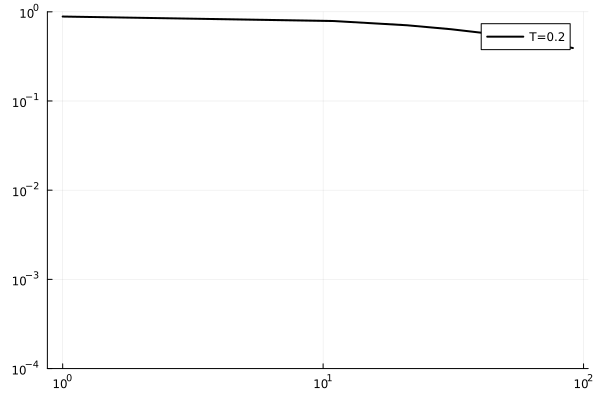

In [15]:
xbins = collect(1:10:100)
# plot(xbins,mean(overlap_all1, dims = 2), xticks = 10.0 .^collect(0:10), xaxis = :log, label = "T=0.1", linewidth = 2, color = :green, xlabel = "Steps", ylabel = "Overlap", 
# xtickfontsize=12,ytickfontsize=12,xlabelfontsize=14,ylabelfontsize=14, size = (700,300))
# plot!(xbins,mean(overlap_all04, dims = 2), xticks = 10.0 .^collect(0:10), xaxis = :log, label = "T=0.04", linewidth = 2, color = :red)
# plot!(xbins,mean(overlap_all02, dims = 2), xticks = 10.0 .^collect(0:10), xaxis = :log, label = "T=0.02", linewidth = 2, color = :black)
# plot!(xbins,mean(overlap_all01, dims = 2), xticks = 10.0 .^collect(0:10), xaxis = :log, label = "T=0.01", linewidth = 2, color = :blue)
# ylims!(0,1)
#plot(xbins,abs.(mean(overlap_all10, dims = 2)), xticks = 10.0 .^collect(0:10), yaxis = :log, xaxis = :log, label = "T=1.0", linewidth = 2, color = :green, xlabel = "Steps", ylabel = "Overlap", 
#xtickfontsize=12,ytickfontsize=12,xlabelfontsize=14,ylabelfontsize=14, size = (700,300))
#plot!(xbins,mean(overlap_all4, dims = 2), xticks = 10.0 .^collect(0:10), yaxis = :log, xaxis = :log, label = "T=0.4", linewidth = 2, color = :red)
plot(xbins,mean(overlap_all2, dims = 2), xticks = 10.0 .^collect(0:10), yaxis = :log, xaxis = :log, label = "T=0.2", linewidth = 2, color = :black)
# plot!(xbins,mean(overlap_all01, dims = 2), xticks = 10.0 .^collect(0:10), yaxis = :log, xaxis = :log, label = "T=0.01", linewidth = 2, color = :blue)
ylims!(0.0001,1)

In [ ]:
Nsamples = 500
Nsteps = 10000000
eq_seq = Multiple_MCMC_Metropolis(Nsamples,Nsteps,S,L,h,J,0.55)

### dAT line code 

In [223]:
function initialize_pars(L::Int, Connectivity::Int, R::Float64)
    p = Connectivity/(L-1)

    ### Initialize seed RNG
    RNGseed = 10
    Random.seed!(RNGseed)
    
    h=zeros(L)
    
    J = zeros(Float64,L,L)
    for i = 1:L
        for j = i+1:L
            if rand() < p
                Jvalue = 1.0 ## Fixed ferromagnetic couplings
                J[i,j] = Jvalue
                J[j,i] = Jvalue
            end
        end
    end

    return h,J
end

    
    
    

initialize_pars (generic function with 1 method)

In [276]:
### Model parameters
L = 100 
Connectivity = 20  ## Average connectivity of the model
R = 0.2
h,J = initialize_pars(L, Connectivity, R)
@time U, Δ, ev_u, avPert, maxPert = dATlineSearch(0.1,h,J)

  0.101538 seconds (1.88 M allocations: 59.819 MiB)


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [46.35375727704111, 60.53188984968505, 57.49810191736831, 50.80205954304741, 18.049529714837842, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.6501999849527538, 69.32419942844868, 1316.7939837153117, 25010.71858759253, 475037.9386087381, 9.022615092636045e6, 1.7137041094370946e8, 3.254912326929608e9, 6.182195788576879e10, 1.1742111911732117e12  …  1.3626498588737681e26, 2.588139825609491e27, 4.915765934502217e28, 9.336726896941053e29, 1.773364930502738e31, 3.368228728814274e32, 6.39742253524411e33, 1.2150901375648802e35, 2.307873263448749e36, 4.383443528572941e37], [25.99999989282001, 513.9999957622682, 9679.999880288195, 184022.9969656026, 3.495545927951427e6, 6.6388401357959636e7, 1.2609434576140249e9, 2.39494453461842e10, 4.548825692985082e11, 8.639784429053528e12  …  1.002630597297951

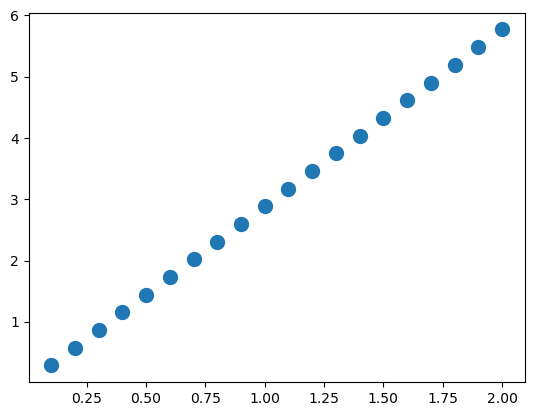

PyObject <matplotlib.collections.PathCollection object at 0x7ff3106e61f0>

In [274]:
L = 100
R = 0.2
C = 4 #Graph Connectivity
J_scales = [1e-1*i for i in 1:20]
T_theor = [J/atanh(1/(C-1)) for J in J_scales] #Critical temperature
plt.scatter(J_scales, T_theor, s = 100)

In [ ]:
L = 800
R = 0.2
C = 3 #Graph Connectivity
J_scales = [1e-1*i for i in 1:20] #coupling scale
T_theor = [J/atanh(1/(C-1)) for J in J_scales] #Critical temperature


x = []; y = []; z = [];

start = time()
for i in 1:length(J_scales) 
    Ts = [1e-1*n for n in 1:40]
    for T in Ts
        h,J = initialize_pars(L, C, R)
        J .*= J_scales[i]
        U, Δ, ev_u, avPert, maxPert = dATlineSearch(T,h,J)
        push!(x, J_scales[i])
        push!(y,T)
        push!(z, avPert[end])
    end
end
fine = time()
println(fine-start)

In [ ]:

tresh = 10000
plt.scatter(x, y, c=log.(z), s = 50, cmap="viridis")
#plt.scatter(x[z.>tresh], y[z.>tresh], color = "blue", s = 5)
#plt.scatter(x[z.<tresh], y[z.<tresh], color = "red", s = 5)
plt.plot(J_scales, T_theor, label = "Theory")
plt.colorbar(label = "Average Perturbation (log scale)")  # Aggiunge una barra dei colori
plt.ylabel("T")
plt.xlabel("J")
plt.legend()
savefig("../phase_transition.png")

In [ ]:
# Creiamo lo scatter plot
tresh = 100
plt.scatter(x[z.>tresh], y[z.>tresh], color = "blue", s = 5)
plt.scatter(x[z.<tresh], y[z.<tresh], color = "red", s = 5)
plt.plot(J_scales, T_theor, label = "Theory")
plt.ylabel("T")
plt.xlabel("J")
plt.legend()
#savefig("../phase_transition.png")